<a href="https://colab.research.google.com/github/SujalChauhan04/Generative-AI-labfile/blob/main/Experiment-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
pip install matplotlib

In [29]:
from tensorflow import keras
from keras.datasets import mnist # MNIST dataset is included in Keras
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


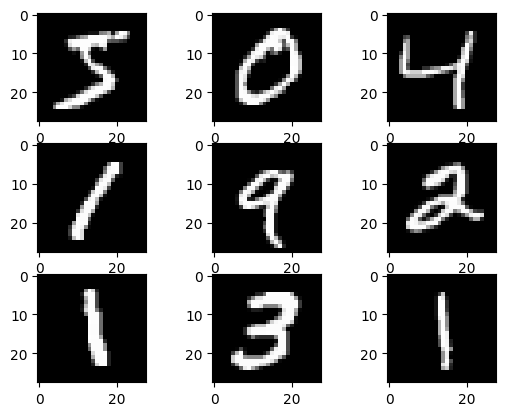

In [6]:
# Plot first few images
import matplotlib.pyplot as plt
for i in range(9):
# define subplot
  plt.subplot(3,3,i+1) # 3 rows, 3 col, pos
# plot raw pixel data
  plt.imshow(X_train[i], cmap='gray')
# show the figure
plt.show()


In [7]:
X_train[i].shape


(28, 28)

In [9]:
# Each pixel is an 8-bit integer from 0-255 (0 is full black, 255 is full white)
# single-channel pixel or monochrome image
X_train[i][10:20,10:20]

array([[  0,   0,  20, 254, 254, 108,   0,   0,   0,   0],
       [  0,   0,  16, 239, 254, 143,   0,   0,   0,   0],
       [  0,   0,   0, 178, 254, 143,   0,   0,   0,   0],
       [  0,   0,   0, 178, 254, 143,   0,   0,   0,   0],
       [  0,   0,   0, 178, 254, 162,   0,   0,   0,   0],
       [  0,   0,   0, 178, 254, 240,   0,   0,   0,   0],
       [  0,   0,   0, 113, 254, 240,   0,   0,   0,   0],
       [  0,   0,   0,  83, 254, 245,  31,   0,   0,   0],
       [  0,   0,   0,  79, 254, 246,  38,   0,   0,   0],
       [  0,   0,   0,   0, 214, 254, 150,   0,   0,   0]], dtype=uint8)

In [10]:
# reshape 28 x 28 matrices into 784-length vectors
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
# normalize each value for each pixel for the entire vector for each input
# change integers to 32-bit floating point numbers
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize by dividing by largest pixel value
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [12]:
# Sequential keras model with Dense layes (DIY)
from keras.models import Sequential # Model type to be used
from keras.layers import Dense # Types of layers to be used in our model
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
# Hidden layer with 32 units and relu activation
model.add(Dense(32, input_dim = 28 * 28, activation= 'relu'))
# Input layer with 64 units and relu activation
model.add(Dense(64, activation = 'relu'))
# Output layer with 10 units and softmax activation
model.add(Dense(10, activation = 'softmax'))
# Compile model
model.compile(
 optimizer='adam',
 loss='categorical_crossentropy',
 metrics=[
 'accuracy',
 'AUC',
 ]
)

In [30]:
# Visualize the model
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=False)


ModuleNotFoundError: No module named 'keras.utils.vis_utils'

In [17]:
# # Visualize the model
# from keras.utils.vis_utils import plot_model
# plot_model(model, show_shapes=True, show_layer_names=False)
# Display model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                25120     
                                                                 
 dense_4 (Dense)             (None, 64)                2112      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 27882 (108.91 KB)
Trainable params: 27882 (108.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
#understand model summary
784*64 + 64

50240

In [19]:
64*32 + 32


2080

In [20]:
32*10 + 10


330

In [21]:
from tensorflow.keras.utils import to_categorical
y_train1 = to_categorical(y_train)
y_test1 = to_categorical(y_test)
print(y_test[6])
print(y_test1[6,:])


4
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [22]:
# Train the model
epochs=10
batch = 64
history = model.fit(X_train, y_train1,epochs=epochs,
batch_size=batch,verbose=1, validation_data=(X_test, y_test1))

Epoch 1/10
938/938 [==============================] - 4s 3ms/step - loss: 0.3831 - accuracy: 0.8892 - auc: 0.9905 - val_loss: 0.1928 - val_accuracy: 0.9447 - val_auc: 0.9961
Epoch 2/10
938/938 [==============================] - 3s 3ms/step - loss: 0.1755 - accuracy: 0.9480 - auc: 0.9967 - val_loss: 0.1609 - val_accuracy: 0.9530 - val_auc: 0.9969
Epoch 3/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1337 - accuracy: 0.9600 - auc: 0.9979 - val_loss: 0.1222 - val_accuracy: 0.9639 - val_auc: 0.9977
Epoch 4/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1088 - accuracy: 0.9668 - auc: 0.9983 - val_loss: 0.1290 - val_accuracy: 0.9632 - val_auc: 0.9973
Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0941 - accuracy: 0.9713 - auc: 0.9987 - val_loss: 0.1121 - val_accuracy: 0.9667 - val_auc: 0.9979
Epoch 6/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0823 - accuracy: 0.9744 - auc: 0.9989 - val_loss: 0.10

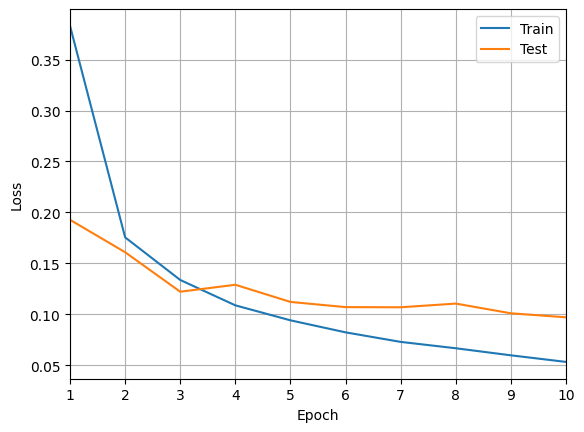

In [23]:
epochRange = range(1,epochs+1);
plt.plot(epochRange,history.history['loss'])
plt.plot(epochRange,history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.xlim((1,epochs))
plt.legend(['Train','Test'])
plt.show()

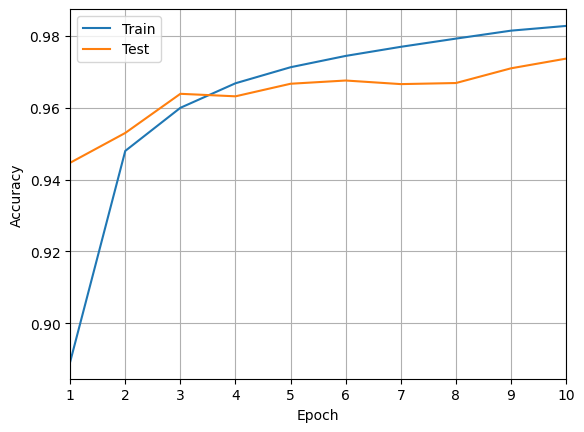

In [24]:
plt.plot(epochRange,history.history['accuracy'])
plt.plot(epochRange,history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.xlim((1,epochs))
plt.legend(['Train','Test'])
plt.show()

In [26]:
import numpy as np
yhat_test_mdl_prob = model.predict(X_test);
yhat_test_mdl = np.argmax(yhat_test_mdl_prob,axis=-1)
print(yhat_test_mdl_prob[0])
print(yhat_test_mdl[0:10])
print(y_test[0:10])

from sklearn.metrics import accuracy_score
print('Accuracy:')
print(float(accuracy_score(y_test, yhat_test_mdl))*100,'%')

313/313 [==============================] - 2s 5ms/step
[1.2747709e-05 4.2756906e-07 2.5966008e-06 1.4443049e-03 9.6608666e-11
 2.1490700e-06 3.8222736e-10 9.9849784e-01 8.8767965e-06 3.0956395e-05]
[7 2 1 0 4 1 4 9 5 9]
[7 2 1 0 4 1 4 9 5 9]
Accuracy:
97.37 %


In [31]:
from sklearn.metrics import confusion_matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, yhat_test_mdl))


Confusion Matrix:
[[ 964    0    2    1    1    1    4    0    2    5]
 [   0 1126    2    1    0    2    2    0    2    0]
 [   2    2 1001    4    2    0    4   10    7    0]
 [   0    2    8  981    0    8    1    6    1    3]
 [   0    0    7    0  960    1    4    0    0   10]
 [   4    1    0   10    3  855    8    1    4    6]
 [   3    2    0    0    4    5  944    0    0    0]
 [   0    3    7    5    1    1    0 1008    1    2]
 [   3    2    7   17    5    5    4    5  924    2]
 [   2    5    0    6   12    2    0    8    0  974]]
